# Part II - Prosper Loan Data Information
## by Jonathan Ravel


## Investigation Overview


> In this exploration I show the rapid growth of Prosper from 2010 to 2013. Borrowers were very interested in their signature product!

> Yet the rates the borrowers paid varied greatly - some paid under 10% APR (Annual Percentage Rate), while others paid more than 35%.


## Dataset Overview

> Loan data from Prosper from 2005 to 2014 that had data on 113,937 loans with 81 variables. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as mtick

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])
df['Year'] = pd.DatetimeIndex(df['LoanOriginationDate']).year
df_fullyears = df[ (df['Year'] >= 2006) & (df['Year'] <= 2013)]
df = df.rename(columns = {'ProsperRating (numeric)' : 'ProsperRating_n'})
df_1 = df [ (df['ProsperRating_n'] == 1)]
df_2 = df [ (df['ProsperRating_n'] == 2)]
df_3 = df [ (df['ProsperRating_n'] == 3)]
df_4 = df [ (df['ProsperRating_n'] == 4)]
df_5 = df [ (df['ProsperRating_n'] == 5)]
df_6 = df [ (df['ProsperRating_n'] == 6)]
df_7 = df [ (df['ProsperRating_n'] == 7)]


## Visualization 1

>  Prosper grew rapidly after the Great Financial Crisis, especially from 2010 to 2013. Total loans increased at a rapid pace.

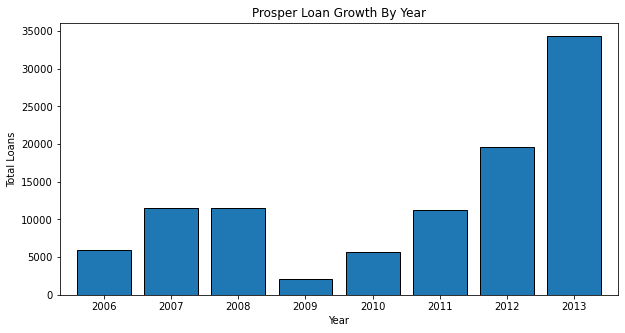

In [3]:

df_fullyears.groupby(["Year"])["Year"].count().plot.bar(edgecolor='black', title = "Prosper Loan Growth By Year", ylabel = ('Total Loans'), figsize=[10, 5],rot=0,width=0.8);

## Visualization 2

> The rates borrowers were paying for these period loans varied greatly, from under 10% to over 35%!

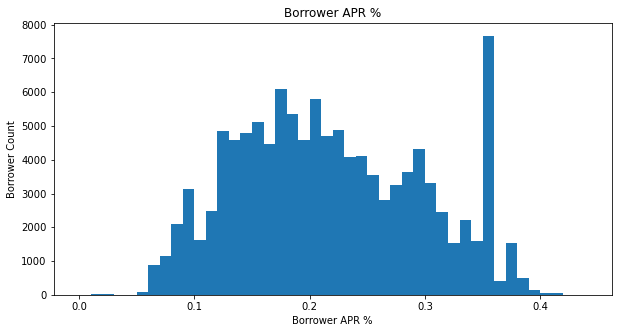

In [4]:
binsize = 0.01
bins = np.arange(0, .45, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = ('BorrowerAPR'), bins = bins)

plt.title('Borrower APR %')
plt.xlabel('Borrower APR %')
plt.ylabel('Borrower Count')

plt.show()

## Visualization 3

> Prosper assigned ratings to these borrowers, which reflected their idea of the best borrowers (Rating 7) who paid the lowest rates, and the most risky borrowers (Rating 1), who paid the highest rates.

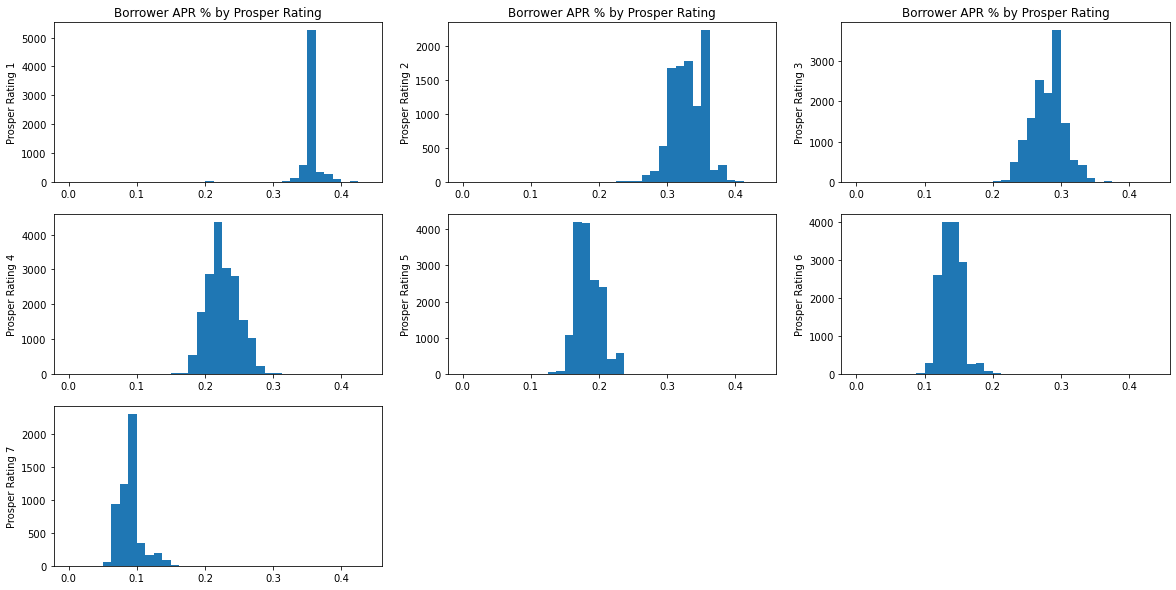

In [5]:
plt.figure(figsize = [20, 10]) 
bins = np.arange(0,.4+.05, .0125)

plt.subplot(3, 3, 1) 
plt.hist(data = df_1, x = 'BorrowerAPR', bins = bins)
plt.title('Borrower APR % by Prosper Rating')
plt.ylabel('Prosper Rating 1')

plt.subplot(3, 3, 2) 
plt.title('Borrower APR % by Prosper Rating')
plt.hist(data = df_2, x = 'BorrowerAPR', bins = bins)
plt.ylabel('Prosper Rating 2');

plt.subplot(3, 3, 3) 
plt.title('Borrower APR % by Prosper Rating')
plt.hist(data = df_3, x = 'BorrowerAPR', bins = bins)
plt.ylabel('Prosper Rating 3');

plt.subplot(3, 3, 4) 
plt.hist(data = df_4, x = 'BorrowerAPR', bins = bins)
plt.ylabel('Prosper Rating 4');

plt.subplot(3, 3, 5) 
plt.hist(data = df_5, x = 'BorrowerAPR', bins = bins)
plt.ylabel('Prosper Rating 5');

plt.subplot(3, 3, 6) 
plt.hist(data = df_6, x = 'BorrowerAPR', bins = bins)
plt.ylabel('Prosper Rating 6');

plt.subplot(3, 3, 7) 
plt.hist(data = df_7, x = 'BorrowerAPR', bins = bins)
plt.ylabel('Prosper Rating 7');

## Visualization 4

> And yet, these rates had little to do with standard credit measures like Credit Score and Debt to Income Ratio. This correlation graph shows little connection between these two measures and the rate Prosper assigned to their borrowers.

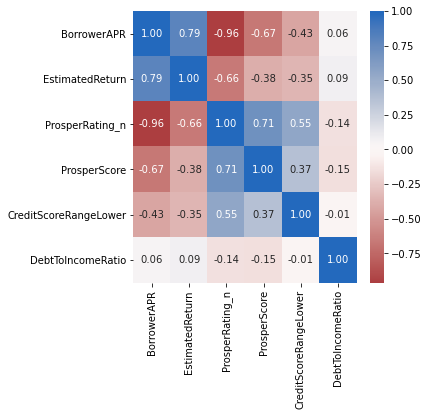

In [5]:
vars = ['BorrowerAPR' , 'EstimatedReturn', 'ProsperRating_n', 'ProsperScore', 'CreditScoreRangeLower', 'DebtToIncomeRatio']
plt.figure(figsize = [5, 5])
sb.heatmap(df[vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

> This means Prosper was using measures other than Credit Score to underwrite their borrowers! 

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert communicate_data_part2_jonathanravel.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 